In [1]:
from generator_model import Generator
from torch import optim
import torch
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from torch.utils.data import DataLoader
from dataset import Image_dataset
import config
from tqdm import tqdm

gen = Generator(in_channels=3)
checkpoint = torch.load("gen.pth.tar", map_location=torch.device(config.DEVICE))
gen.load_state_dict(checkpoint['state_dict'])
optimizer = optim.Adam(gen.parameters())
optimizer.load_state_dict(checkpoint['optimizer'])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <2BD1B165-EC09-3F68-BCE4-8FE4E70CA7E2> /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <9C467D80-5BAC-3156-B480-F0FF7E45DEF2> /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/album

In [2]:
image_pth = "image_dataset/Test/_02529.jpg"
input = np.array(Image.open(image_pth))[:, :256, ...]
inter = np.array(Image.open(image_pth))[:, 256:512, ...]
target = np.array(Image.open(image_pth))[:, 512:, ...]

In [8]:
val_dataset = Image_dataset(root_dir=config.VAL_DIR)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)

In [4]:
val_dataset = Image_dataset(root_dir=config.VAL_DIR)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)

all = {"x": [], "z": [], "y": [], "y_fake": []}

# x, y = next(iter(val_loader))

per = 25
for idx, (x,z,y) in tqdm(enumerate(val_loader)):
    if idx == per: break
    x, z, y = x.to(config.DEVICE), z.to(config.DEVICE), y.to(config.DEVICE)
    gen.eval()
    with torch.no_grad():
        y_fake = gen(x,z)
        y_fake = y_fake * 0.5 + 0.5
        y = y * 0.5 + 0.5
        x = x * 0.5 + 0.5
    all["x"].append(x)
    all["z"].append(z)
    all["y"].append(y)
    all["y_fake"].append(y_fake)
    

25it [00:02, 10.04it/s]


In [5]:
def convert(x):
    return np.moveaxis(np.array(x[0, :, :, :]), 0, -1)

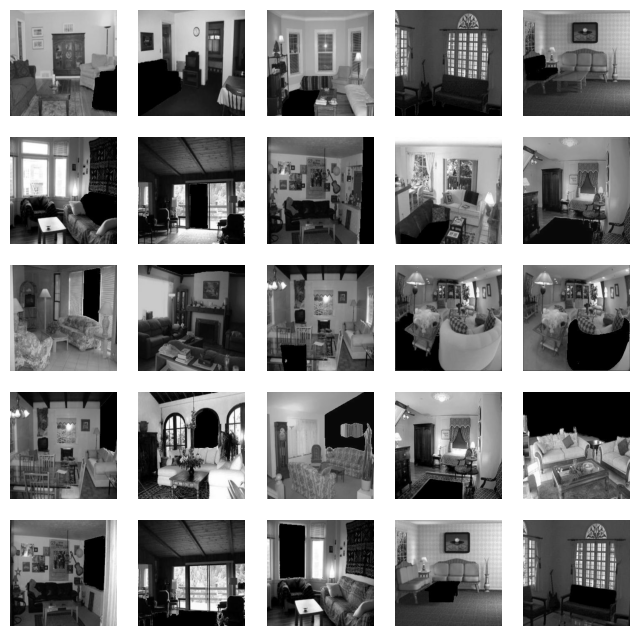

In [6]:
fig = plt.figure(figsize=(8, 8))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    img = convert(all['x'][i-1])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis("off")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

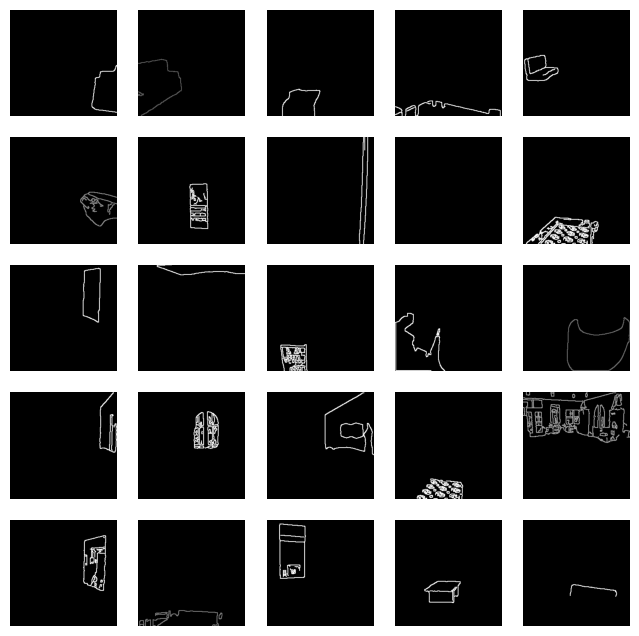

In [8]:
fig = plt.figure(figsize=(8, 8))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    img = convert(all['z'][i-1])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis("off")


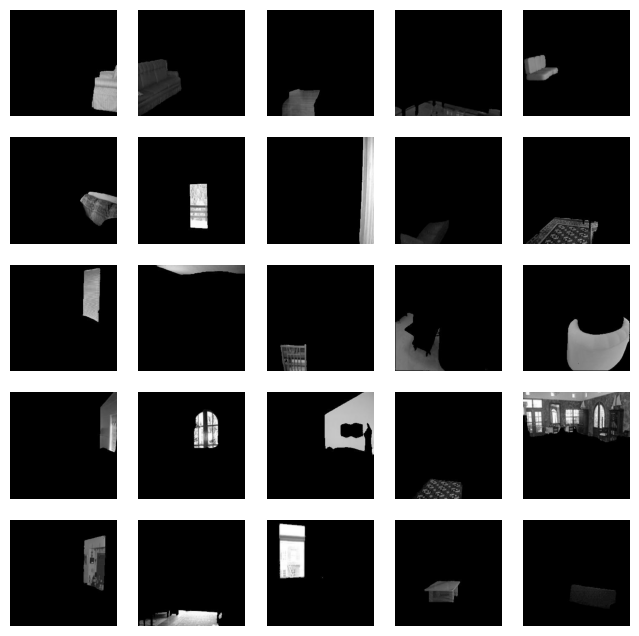

In [7]:
fig = plt.figure(figsize=(8, 8))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    img = convert(all['y'][i-1])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis("off")


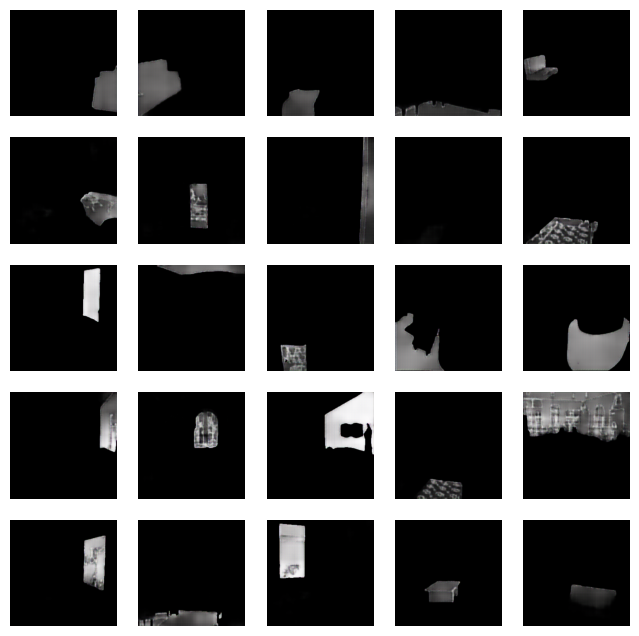

In [9]:
fig = plt.figure(figsize=(8, 8))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    img = convert(all['y_fake'][i-1])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis("off")

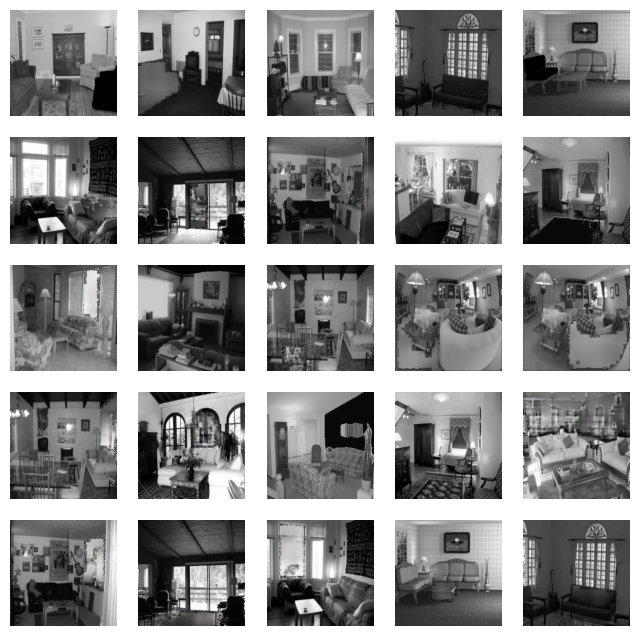

In [19]:
fig = plt.figure(figsize=(8, 8))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    x_image = convert(all['x'][i-1])
    y_fake_image = convert(all['y_fake'][i-1])
    mask = (x_image == 0).all(axis=-1) 
    x_image[mask] = y_fake_image[mask]

    fig.add_subplot(rows, columns, i)
    plt.imshow(x_image)
    plt.axis("off")